# Proyecto Trigonometría

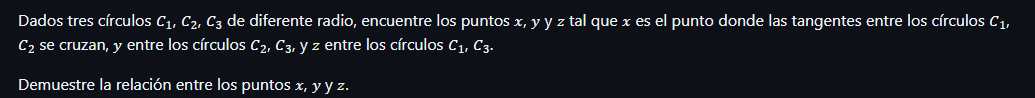

## Librerías necesarias

pip install numpy matplotlib pyqt5


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def outer_tangent_points(CA, CB, rA, rB):
    d = CB - CA
    dist = np.linalg.norm(d)
    if dist == 0:
        return (CA, CB, CA, CB)
    u = d / dist
    v = np.array([-u[1], u[0]])
    p1 = CA + v * rA
    p2 = CB + v * rB
    q1 = CA - v * rA
    q2 = CB - v * rB
    return (p1, p2, q1, q2)

def line_intersection(p1, p2, p3, p4):
    A1 = p2[1] - p1[1]
    B1 = p1[0] - p2[0]
    C1 = A1 * p1[0] + B1 * p1[1]
    A2 = p4[1] - p3[1]
    B2 = p3[0] - p4[0]
    C2 = A2 * p3[0] + B2 * p3[1]
    det = A1 * B2 - A2 * B1
    if det == 0:
        return None
    else:
        x = (B2 * C1 - B1 * C2) / det
        y = (A1 * C2 - A2 * C1) / det
        return np.array([x, y])

centers = [np.array([0, 0]), np.array([3, 1]), np.array([5, 3])]
radii = [1., 1.2, 0.8]
dragging = None

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.set_xlim(-20, 25)  # Ampliar vista
ax.set_ylim(-15, 25)
ax.grid(True, linestyle='--', alpha=0.5)

circle_patches = []
for c, r, color in zip(centers, radii, ['blue', 'green', 'red']):
    patch = plt.Circle(c, r, fill=False, color=color, linestyle='--', linewidth=2)
    ax.add_patch(patch)
    circle_patches.append(patch)

tangent_lines = []
intersection_points = []
line_xyz, = ax.plot([], [], 'k--', linewidth=2.5)

def update_plot():
    global tangent_lines, intersection_points
    for line in tangent_lines:
        line.remove()
    for point in intersection_points:
        point.remove()
    tangent_lines = []
    intersection_points = []

    (px1, px2, qx1, qx2) = outer_tangent_points(centers[0], centers[1], radii[0], radii[1])
    (py1, py2, qy1, qy2) = outer_tangent_points(centers[1], centers[2], radii[1], radii[2])
    (pz1, pz2, qz1, qz2) = outer_tangent_points(centers[0], centers[2], radii[0], radii[2])

    x = line_intersection(px1, px2, qx1, qx2)
    y = line_intersection(py1, py2, qy1, qy2)
    z = line_intersection(pz1, pz2, qz1, qz2)

    # Tangentes entre círculo 0 y 1
    for i, p in enumerate([px1, px2, qx1, qx2]):
        if x is not None:
            tangent_lines.append(ax.plot([p[0], x[0]], [p[1], x[1]], 'blue',
                                         label='Tangentes círculo 1-2' if i == 0 else "")[0])
    for i, p in enumerate([py1, py2, qy1, qy2]):
        if y is not None:
            tangent_lines.append(ax.plot([p[0], y[0]], [p[1], y[1]], 'green',
                                         label='Tangentes círculo 2-3' if i == 0 else "")[0])
    for i, p in enumerate([pz1, pz2, qz1, qz2]):
        if z is not None:
            tangent_lines.append(ax.plot([p[0], z[0]], [p[1], z[1]], 'red',
                                         label='Tangentes círculo 1-3' if i == 0 else "")[0])

    for i, (pt, color, lbl) in enumerate(zip([x, y, z],
                                             ['k', 'm', 'c'],
                                             ['Intersección 1-2', 'Intersección 2-3', 'Intersección 1-3'])):
        if pt is not None:
            intersection_points.append(ax.plot(*pt, color + 'o', markersize=7,
                                               label=lbl if i == 0 else "")[0])

    if all(p is not None for p in [x, y, z]):
        line_xyz.set_data([x[0], y[0], z[0]], [x[1], y[1], z[1]])
        line_xyz.set_label('Línea que une intersecciones x, y, z')
    else:
        line_xyz.set_data([], [])
        line_xyz.set_label(None)

    # Eliminar duplicados de la leyenda y actualizarla
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax.legend(unique.values(), unique.keys(), loc='upper left', fontsize=9)

    fig.canvas.draw_idle()


def on_press(event):
    global dragging
    if event.inaxes != ax:
        return
    for i, patch in enumerate(circle_patches):
        contains, _ = patch.contains(event)
        if contains:
            dragging = i
            break

def on_release(event):
    global dragging
    dragging = None

def on_motion(event):
    if dragging is None or event.inaxes != ax:
        return
    centers[dragging] = np.array([event.xdata, event.ydata])
    circle_patches[dragging].center = centers[dragging]
    update_plot()

fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)
fig.canvas.mpl_connect('motion_notify_event', on_motion)

update_plot()
plt.show()

%matplotlib qt